<a href="https://colab.research.google.com/github/RaoMasood1/diabetes_data_prediction/blob/main/diabetes_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score

In [186]:
import pandas as pd # Data Processing
import numpy as np
df= pd.read_csv('/content/diabetes_data.csv')

In [187]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
df.tail()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [189]:
type(df)

pandas.core.frame.DataFrame

In [190]:
df.sample(3)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
26074,8.0,0.0,1.0,1.0,22.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0
22638,2.0,0.0,0.0,1.0,46.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
27966,12.0,1.0,1.0,1.0,23.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [191]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [193]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
df.shape

(70692, 18)

In [195]:
df.ndim

2

In [196]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [197]:
df.Diabetes.nunique()

2

In [198]:
df.Diabetes.unique()

array([0., 1.])

In [199]:
df["Diabetes"].unique()

array([0., 1.])

In [200]:
df["BMI"].unique()

array([26., 28., 29., 18., 31., 32., 27., 24., 21., 58., 30., 20., 22.,
       38., 40., 25., 36., 47., 19., 37., 41., 23., 34., 35., 42., 17.,
       33., 44., 15., 52., 69., 56., 45., 39., 92., 53., 98., 50., 46.,
       79., 48., 16., 63., 72., 54., 49., 68., 43., 84., 73., 76., 55.,
       51., 75., 57., 60., 12., 77., 82., 67., 71., 61., 14., 81., 59.,
       86., 13., 87., 65., 95., 89., 62., 64., 66., 85., 70., 83., 80.,
       78., 74.])

In [201]:
df.head(3)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0


In [202]:
df.Diabetes.value_counts(True)

0.0    0.5
1.0    0.5
Name: Diabetes, dtype: float64

In [203]:
df["Diabetes"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [204]:
df["Diabetes"].sample(20)

8564     0.0
12971    0.0
4932     0.0
28528    0.0
225      0.0
3284     0.0
51222    1.0
54261    1.0
52616    1.0
69298    1.0
25400    0.0
31399    0.0
68159    1.0
60049    1.0
37555    1.0
58972    1.0
34365    0.0
1502     0.0
67734    1.0
7676     0.0
Name: Diabetes, dtype: float64

In [205]:
df.Diabetes.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

Text(0.5, 1.0, 'Diabetes Prediction')

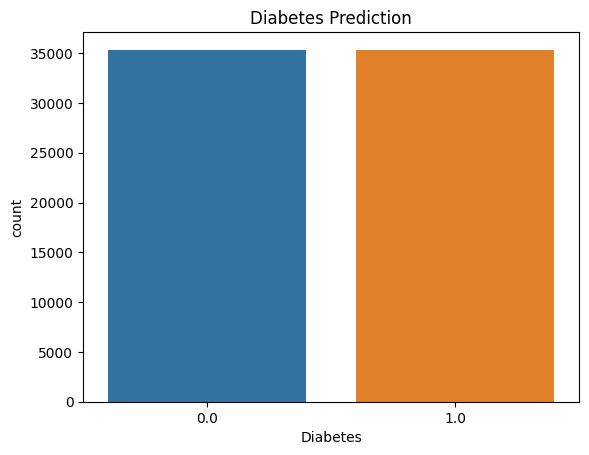

In [206]:
# Show Number of Patient by Stroke
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df , x='Diabetes')
plt.title('Diabetes Prediction')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [208]:
df.sample(20)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
48608,7.0,0.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
25425,2.0,1.0,0.0,0.0,24.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24699,10.0,1.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
23327,12.0,0.0,0.0,1.0,24.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
47237,8.0,0.0,0.0,1.0,42.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,7.0,12.0,1.0,0.0,1.0,1.0
48689,12.0,0.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0
36362,11.0,1.0,0.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,1.0,1.0
48481,9.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0
17159,9.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
29477,8.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [209]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [210]:
df["Diabetes"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [211]:
df.isnull()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [212]:
df.isnull().any()

Age                     False
Sex                     False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Stroke                  False
HighBP                  False
Diabetes                False
dtype: bool

In [213]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [214]:
print('Missing data sum :')
print(df.isnull().sum())

print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)

Missing data sum :
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

Missing data percentage (%):
Age                     0.0
Sex                     0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Stroke                  0.0
HighBP                

In [215]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [216]:
cd = pd.DataFrame(cat_features)
cd.head()

""


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [218]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  18
********************************************************************************
Numerical Variables Column:  ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [220]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  18
********************************************************************************
Numerical Variables Column:  ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [221]:
print('*'*10)

**********


In [222]:
numerical_features

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [223]:
cat_features

[]

In [224]:
df.BMI.duplicated()

0        False
1         True
2         True
3        False
4        False
         ...  
70687     True
70688     True
70689     True
70690     True
70691     True
Name: BMI, Length: 70692, dtype: bool

In [225]:
df.duplicated().sum()

6672

In [226]:
df['Age'].unique()
df['Age'].nunique()

13

In [227]:
df['Sex'].unique()
df['Sex'].nunique()

2

In [228]:
df['HighChol'].unique()
df['HighChol'].nunique()

2

In [229]:
df['BMI'].unique()
df['BMI'].nunique()

80

In [230]:
df['Smoker'].unique()
df['Smoker'].nunique()

2

In [231]:
df['HeartDiseaseorAttack'].unique()
df['HeartDiseaseorAttack'].nunique()

2

In [232]:
df['PhysActivity'].unique()
df['PhysActivity'].nunique()

2

In [233]:
df['Fruits'].unique()
df['Fruits'].nunique()

2

In [234]:
df['Veggies'].unique()
df['Veggies'].nunique()

2

In [235]:
df['HvyAlcoholConsump'].unique()
df['HvyAlcoholConsump'].nunique()

2

In [236]:
df['GenHlth'].unique()
df['GenHlth'].nunique()

5

In [237]:
df['MentHlth'].unique()
df['MentHlth'].nunique()

31

In [238]:
df['PhysHlth'].unique()
df['PhysHlth'].nunique()

31

In [239]:
df['DiffWalk'].unique()
df['DiffWalk'].nunique()

2

In [240]:
df['Stroke'].unique()
df['Stroke'].nunique()

2

In [241]:
df['HighBP'].unique()
df['HighBP'].nunique()

2

[Text(0.5, 1.0, 'Correlation Matrix')]

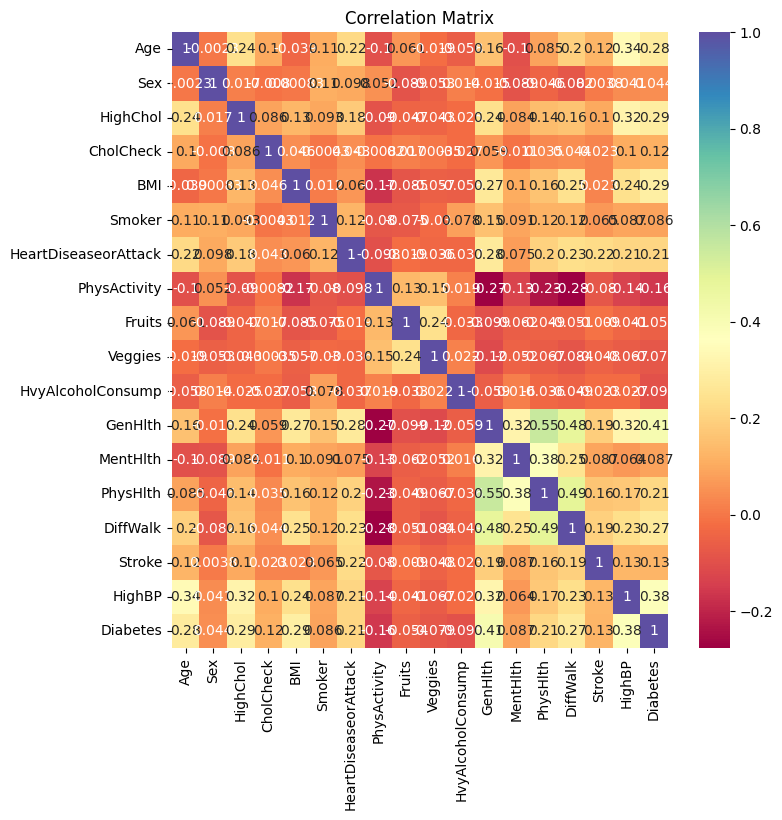

In [242]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<Axes: >

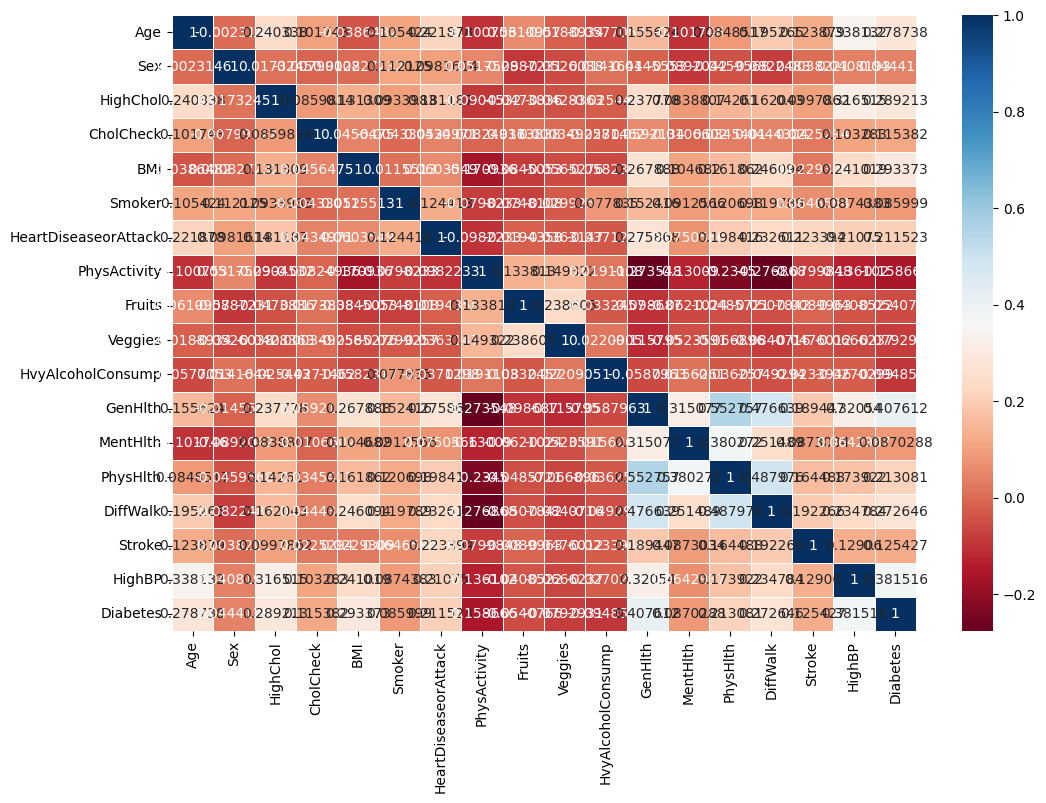

In [243]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

In [244]:
corr_matrix = df.corr().round(2)
corr_matrix

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.00,-0.00,0.24,0.10,-0.04,0.11,0.22,-0.10,0.06,-0.02,-0.06,0.16,-0.10,0.08,0.20,0.12,0.34,0.28
Sex,-0.00,1.00,0.02,-0.01,0.00,0.11,0.10,0.05,-0.09,-0.05,0.01,-0.01,-0.09,-0.05,-0.08,0.00,0.04,0.04
HighChol,0.24,0.02,1.00,0.09,0.13,0.09,0.18,-0.09,-0.05,-0.04,-0.03,0.24,0.08,0.14,0.16,0.10,0.32,0.29
CholCheck,0.10,-0.01,0.09,1.00,0.05,-0.00,0.04,-0.01,0.02,0.00,-0.03,0.06,-0.01,0.03,0.04,0.02,0.10,0.12
BMI,-0.04,0.00,0.13,0.05,1.00,0.01,0.06,-0.17,-0.08,-0.06,-0.06,0.27,0.10,0.16,0.25,0.02,0.24,0.29
Smoker,0.11,0.11,0.09,-0.00,0.01,1.00,0.12,-0.08,-0.07,-0.03,0.08,0.15,0.09,0.12,0.12,0.06,0.09,0.09
HeartDiseaseorAttack,0.22,0.10,0.18,0.04,0.06,0.12,1.00,-0.10,-0.02,-0.04,-0.04,0.28,0.08,0.20,0.23,0.22,0.21,0.21
PhysActivity,-0.10,0.05,-0.09,-0.01,-0.17,-0.08,-0.10,1.00,0.13,0.15,0.02,-0.27,-0.13,-0.23,-0.28,-0.08,-0.14,-0.16
Fruits,0.06,-0.09,-0.05,0.02,-0.08,-0.07,-0.02,0.13,1.00,0.24,-0.03,-0.10,-0.06,-0.05,-0.05,-0.01,-0.04,-0.05
Veggies,-0.02,-0.05,-0.04,0.00,-0.06,-0.03,-0.04,0.15,0.24,1.00,0.02,-0.12,-0.05,-0.07,-0.08,-0.05,-0.07,-0.08


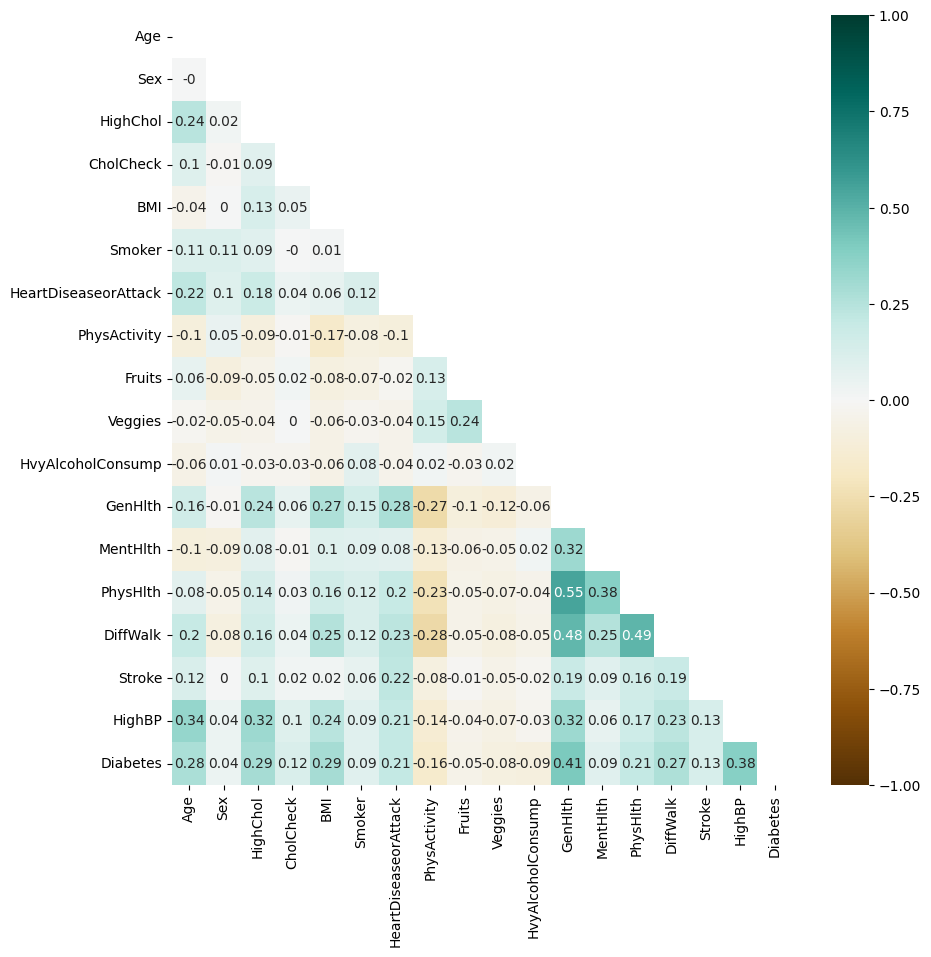

In [245]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [246]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [247]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  18
********************************************************************************
Numerical Variables Column:  ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [248]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='Diabetes',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

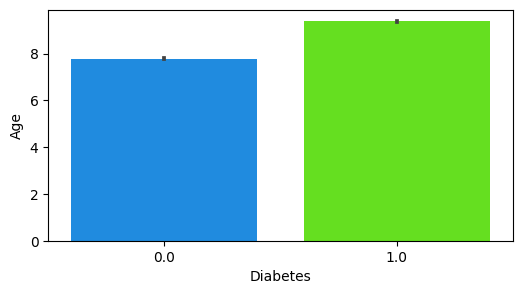

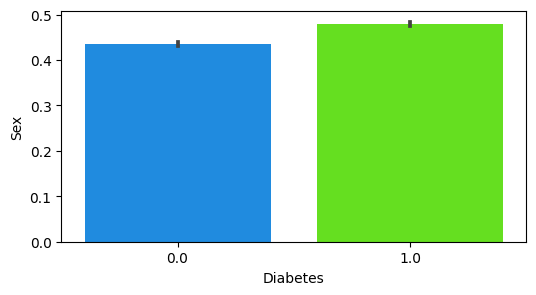

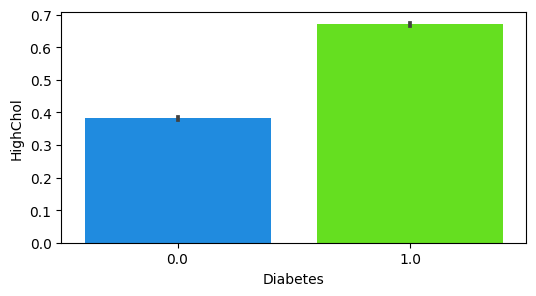

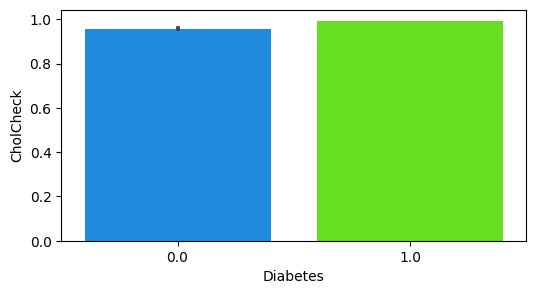

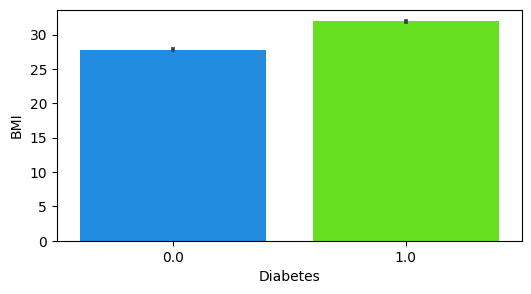

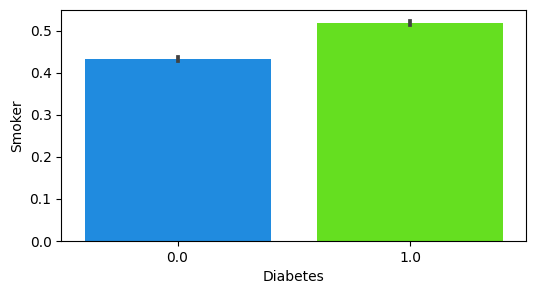

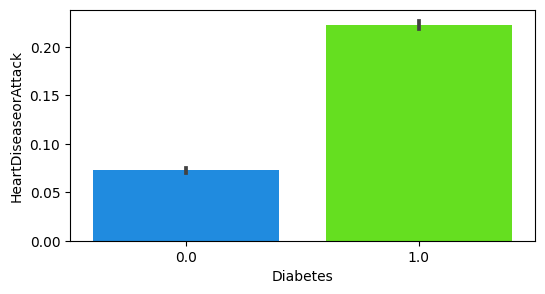

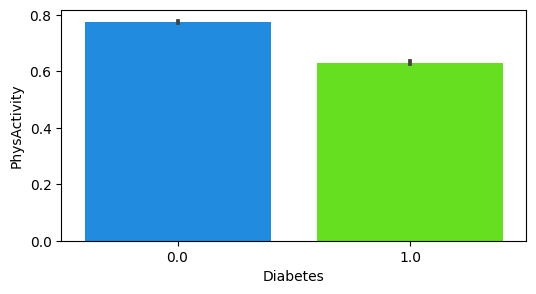

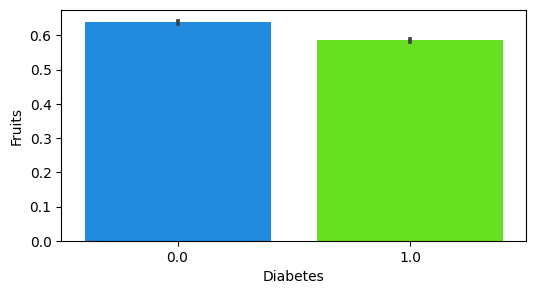

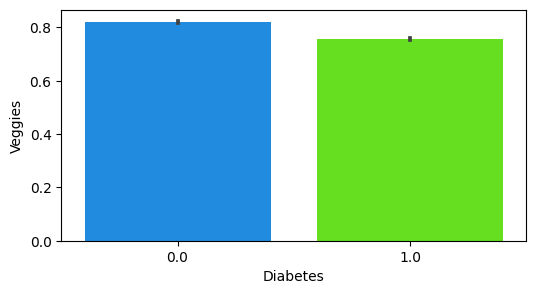

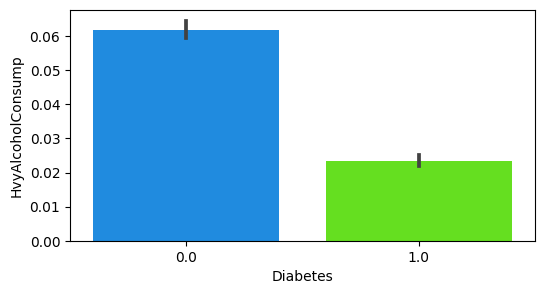

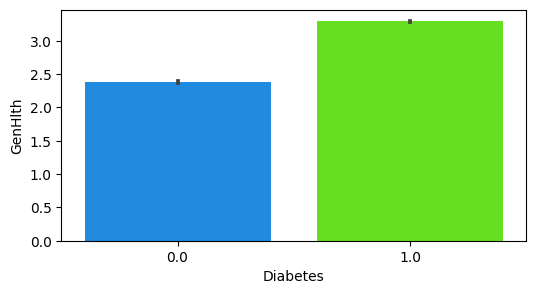

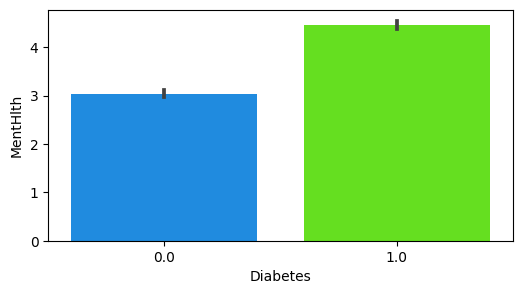

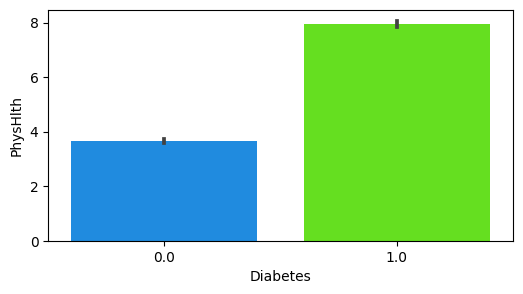

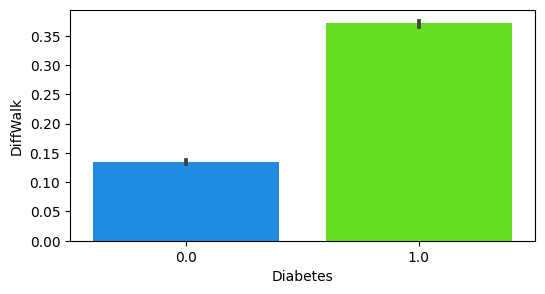

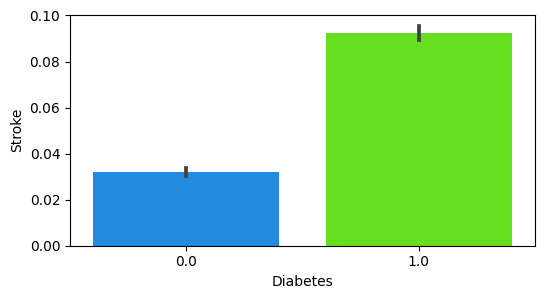

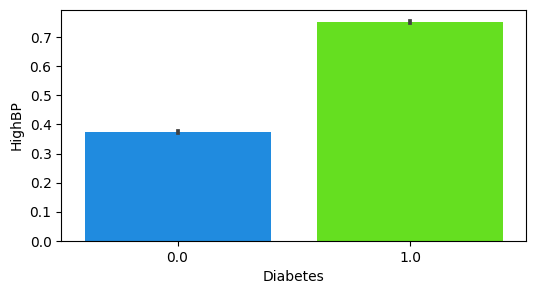

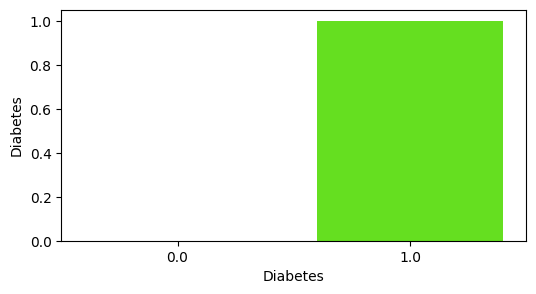

In [249]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='Diabetes',y=col,palette='gist_rainbow_r')

In [250]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [252]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

In [253]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [254]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [255]:
df.shape

(70692, 18)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [257]:
train_data_cat = df.select_dtypes("object")
train_data_num = df.select_dtypes("number")

In [258]:
train_data_cat.head(3)

""
0
1
2


In [259]:
train_data_num.head(3)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0


In [260]:
y = df['Diabetes']
x = df.drop('Diabetes', axis = 1)

In [261]:
print(x.shape)
print(y.shape)

(70692, 17)
(70692,)


In [262]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [263]:
x

array([[-1.60723742,  1.09004602, -1.05279808, ..., -0.58155367,
        -0.25747348,  0.88020109],
       [ 1.19768093,  1.09004602,  0.94984976, ..., -0.58155367,
         3.88389516,  0.88020109],
       [ 1.54829572,  1.09004602, -1.05279808, ..., -0.58155367,
        -0.25747348, -1.13610402],
       ...,
       [ 1.54829572, -0.91739246,  0.94984976, ...,  1.71953175,
        -0.25747348,  0.88020109],
       [ 0.84706614, -0.91739246,  0.94984976, ...,  1.71953175,
        -0.25747348,  0.88020109],
       [ 0.14583655, -0.91739246,  0.94984976, ..., -0.58155367,
        -0.25747348,  0.88020109]])

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [265]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((49484, 17), (21208, 17))

In [266]:
accuracy = {}

0.7483968313843833
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10700
         1.0       0.73      0.77      0.75     10508

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



,Actual,Y test predicted
18593,0.0,0.0
65880,1.0,1.0
44578,1.0,1.0
43418,1.0,1.0
54910,1.0,1.0
59869,1.0,1.0
18826,0.0,1.0
37206,1.0,1.0
10589,0.0,1.0
63169,1.0,1.0


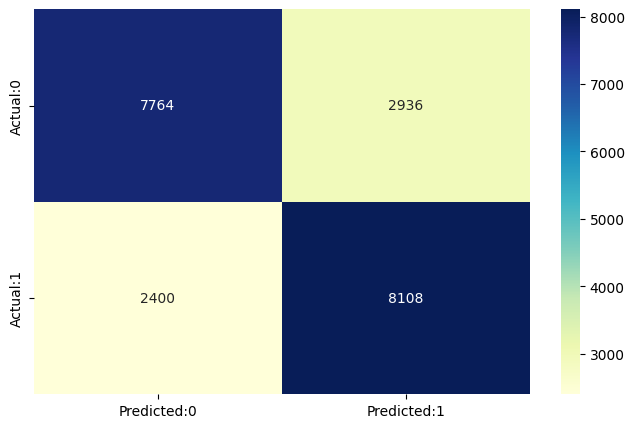

In [267]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression(max_iter=200)
model_logistic.fit(X_train,y_train)

y_pred_logis = model_logistic.predict(X_test)
print(accuracy_score(y_test, y_pred_logis))
logistic_acc = accuracy_score(y_test, y_pred_logis)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_logis)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_logis))

y_pred_test = model_logistic.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=200, max_iter=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Info] Number of positive: 24838, number of negative: 24646
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 49484, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501940 -> initscore=0.007760
[LightGBM] [Info] Start training from score 0.007760
0.7531120331950207
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     10700
         1.0       0.73      0.80      0.76     10508

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      

,Actual,Y test predicted
12690,0.0,0.0
67952,1.0,1.0
25039,0.0,0.0
45923,1.0,1.0
12562,0.0,1.0
69659,1.0,1.0
2124,0.0,0.0
6251,0.0,0.0
64388,1.0,0.0
14890,0.0,0.0


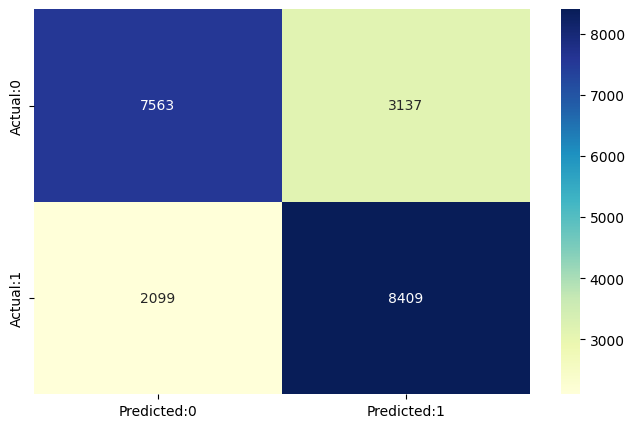

In [268]:
#LightGBM
import lightgbm as lgb
model_gbm= lgb.LGBMClassifier(max_iter=200)
model_gbm.fit(X_train,y_train)

y_pred_gbm = model_gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_gbm))
gbm_accu = accuracy_score(y_test, y_pred_gbm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbm))

y_pred_test = model_gbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7548095058468502
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75     10700
         1.0       0.73      0.80      0.76     10508

    accuracy                           0.75     21208
   macro avg       0.76      0.76      0.75     21208
weighted avg       0.76      0.75      0.75     21208



,Actual,Y test predicted
1798,0.0,0.0
45826,1.0,1.0
22011,0.0,0.0
29420,0.0,0.0
606,0.0,1.0
46020,1.0,1.0
23821,0.0,0.0
30085,0.0,0.0
48070,1.0,1.0
4001,0.0,1.0


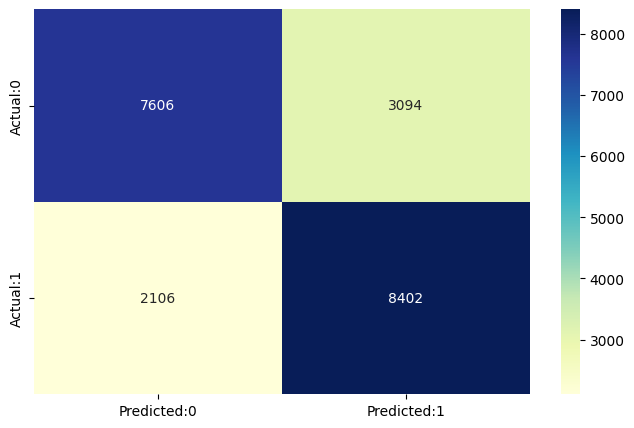

In [269]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)

y_pred_gbc = model_gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))
gbc_accu = accuracy_score(y_test, y_pred_gbc)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbc)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbc))

y_pred_test = model_gbc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7484439834024896
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10700
         1.0       0.72      0.80      0.76     10508

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



,Actual,Y test predicted
31284,0.0,1
68628,1.0,1
69813,1.0,1
43404,1.0,1
34009,0.0,0
24321,0.0,0
21419,0.0,0
43667,1.0,1
1146,0.0,0
53678,1.0,1


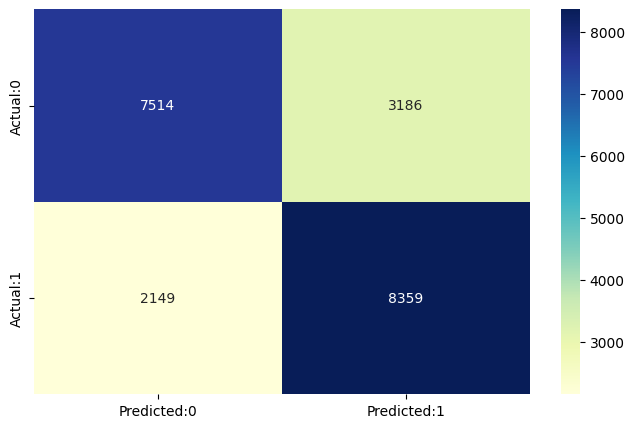

In [270]:
#XGBoost
from xgboost import XGBClassifier
model_xg= XGBClassifier()
model_xg.fit(X_train,y_train)

y_pred_xg = model_xg.predict(X_test)
print(accuracy_score(y_test, y_pred_xg))
xg_accu = accuracy_score(y_test, y_pred_xg)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_xg)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_xg))

y_pred_test = model_xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7291588079969823
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72     10700
         1.0       0.71      0.77      0.74     10508

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



,Actual,Y test predicted
15534,0.0,0.0
47885,1.0,0.0
42535,1.0,0.0
939,0.0,1.0
10433,0.0,0.0
64870,1.0,1.0
49039,1.0,1.0
37920,1.0,0.0
8969,0.0,0.0
7377,0.0,0.0


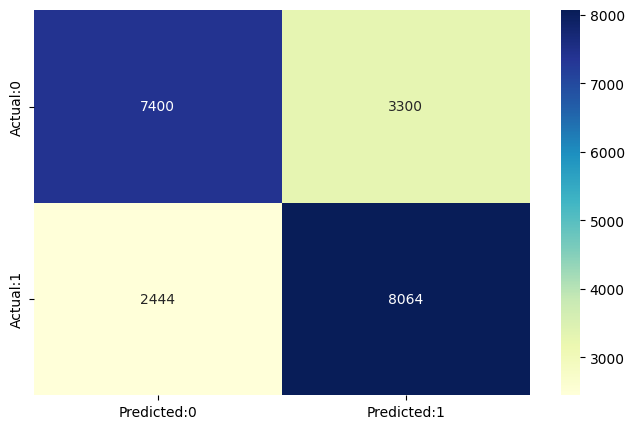

In [271]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_Random= RandomForestClassifier()
model_Random.fit(X_train,y_train)

y_pred_Random= model_Random.predict(X_test)
print(accuracy_score(y_test, y_pred_Random))
rf_accu = accuracy_score(y_test, y_pred_Random)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_Random)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_Random))

y_pred_test = model_Random.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.6589023010184836
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67     10700
         1.0       0.66      0.64      0.65     10508

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



,Actual,Y test predicted
45155,1.0,1.0
37742,1.0,0.0
2212,0.0,0.0
60806,1.0,0.0
13540,0.0,1.0
37064,1.0,0.0
2696,0.0,0.0
69110,1.0,0.0
42012,1.0,0.0
21543,0.0,1.0


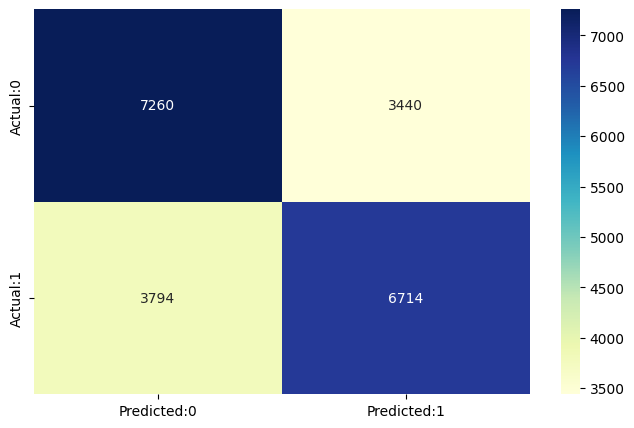

In [272]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

y_pred_tree= model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
tree_accu = accuracy_score(y_test, y_pred_tree)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_tree)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_tree))

y_pred_test = model_tree.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7134571859675594
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71     10700
         1.0       0.70      0.74      0.72     10508

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208



,Actual,Y test predicted
28569,0.0,1.0
62616,1.0,1.0
57533,1.0,1.0
6133,0.0,1.0
54767,1.0,0.0
37109,1.0,1.0
8271,0.0,1.0
37334,1.0,1.0
69862,1.0,1.0
31378,0.0,0.0


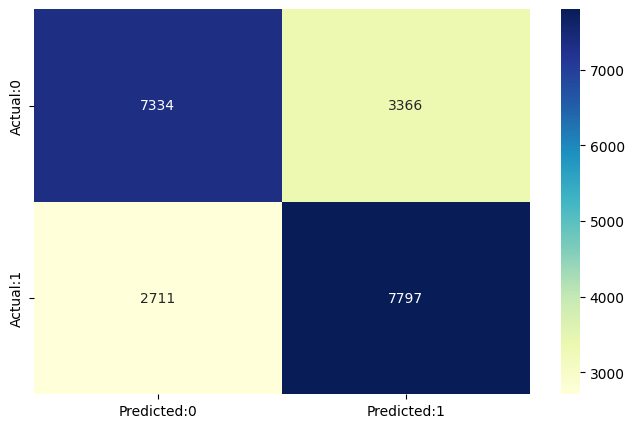

In [273]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)

y_pred_knn= model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
knn_accu = accuracy_score(y_test, y_pred_knn)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_knn)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_knn))

y_pred_test = model_knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7512731044888721
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74     10700
         1.0       0.72      0.81      0.76     10508

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208



,Actual,Y test predicted
41780,1.0,1.0
13751,0.0,0.0
68470,1.0,1.0
32042,0.0,1.0
58337,1.0,0.0
58812,1.0,1.0
63811,1.0,0.0
13600,0.0,0.0
42826,1.0,1.0
18949,0.0,1.0


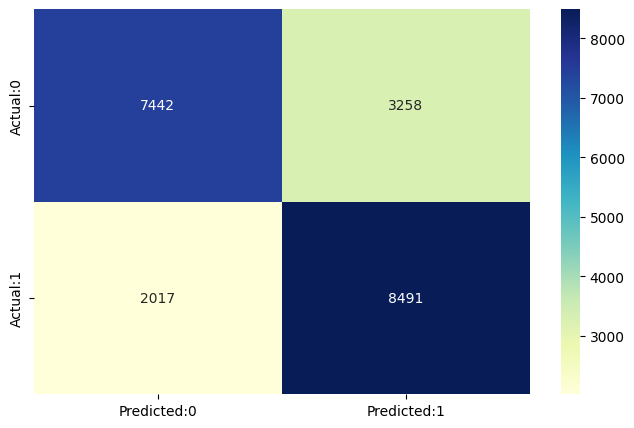

In [274]:
#SVM
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)

y_pred_svm= model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))
svm_accu = accuracy_score(y_test, y_pred_svm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_svm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_svm))

y_pred_test = model_svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

In [275]:
accuracy

{}

#Graph without SMOTE

Text(0, 0.5, 'Accuracy')

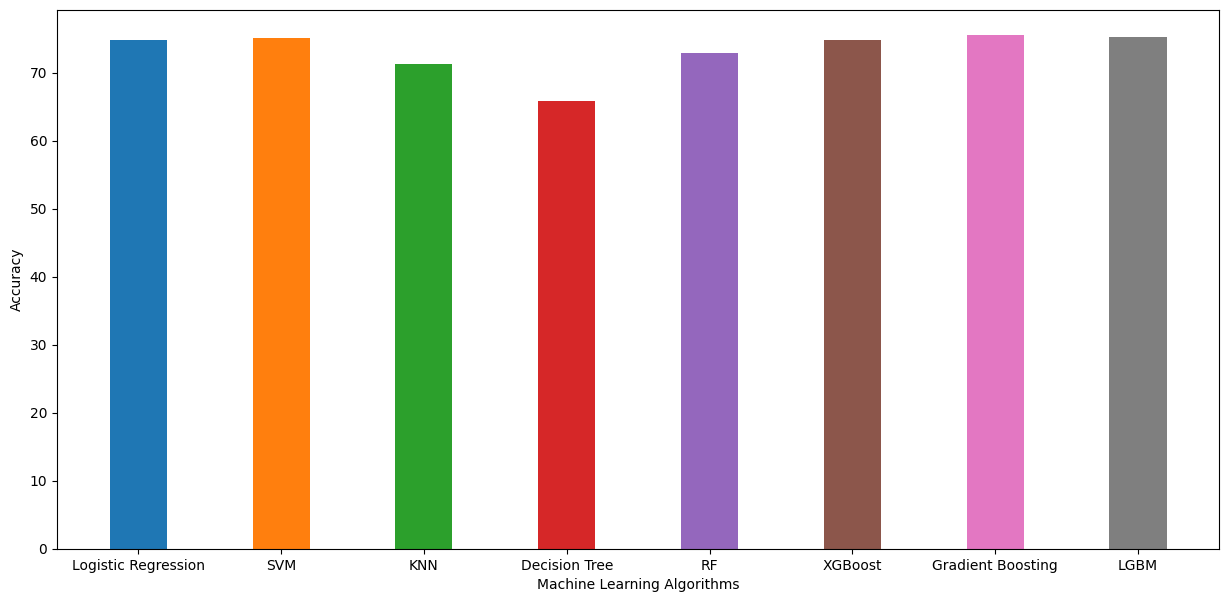

In [276]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')

#Handling With SMOTE

In [277]:
from imblearn.over_sampling import SMOTE

In [278]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

print(y1.value_counts())

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64


In [279]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = 'True',random_state = 3)

In [280]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49484, 17)
(21208, 17)
(49484,)
(21208,)


0.7506129762353829
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75     10585
         1.0       0.74      0.77      0.76     10623

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



,Actual,Y test predicted
5873,0.0,1.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,0.0
35934,1.0,1.0


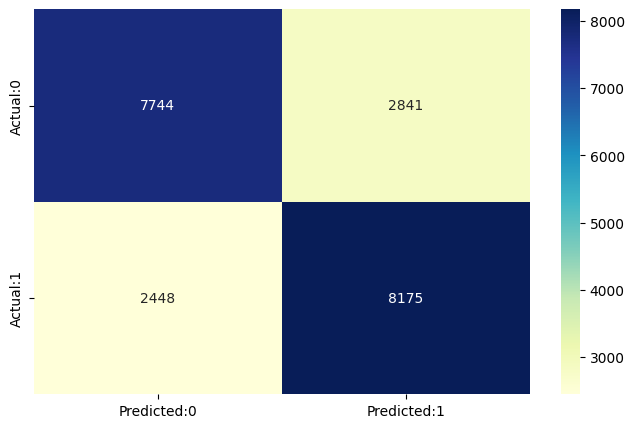

In [281]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
logis_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.750377216144851
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10585
         1.0       0.73      0.80      0.76     10623

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



,Actual,Y test predicted
5873,0.0,1.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,0.0
35934,1.0,1.0


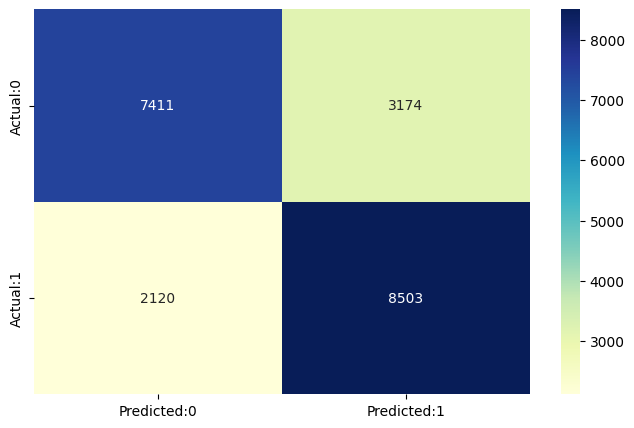

In [282]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
svm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7141173142210486
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71     10585
         1.0       0.70      0.74      0.72     10623

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208



,Actual,Y test predicted
5873,0.0,0.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,0.0
35934,1.0,1.0


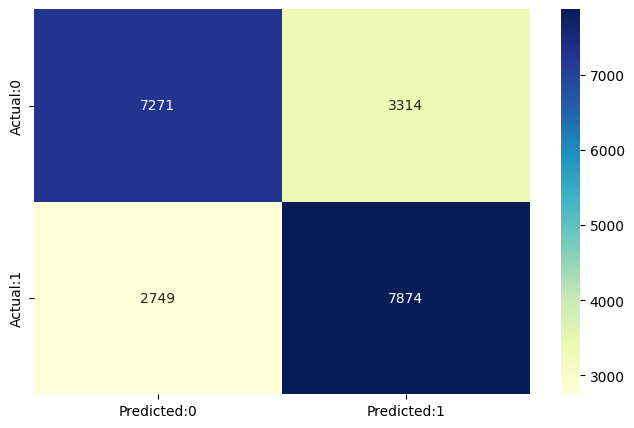

In [283]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred1))
knn_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.6591852131271219
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67     10585
         1.0       0.67      0.64      0.65     10623

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



,Actual,Y test predicted
5873,0.0,1.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,1.0
35934,1.0,1.0


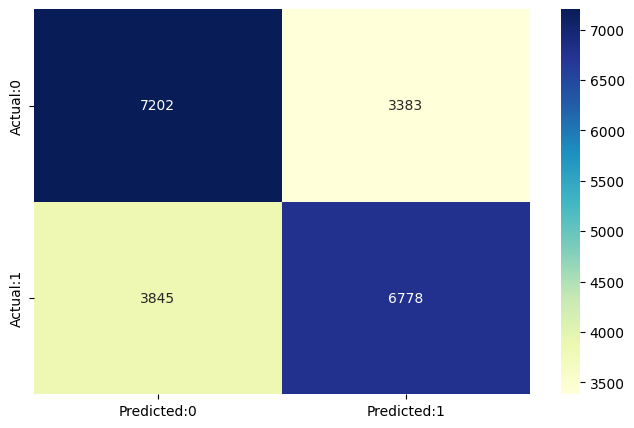

In [284]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(accuracy_score(y_test, y_pred1))
dt_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = dt.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.6576291965296115
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.66     10585
         1.0       0.67      0.64      0.65     10623

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



,Actual,Y test predicted
5873,0.0,1.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,1.0
35934,1.0,1.0


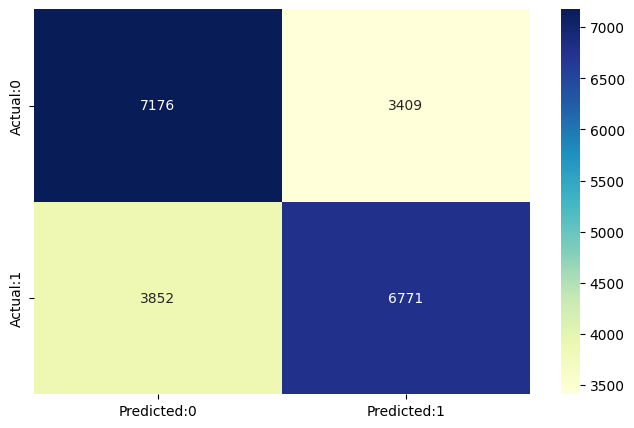

In [285]:
rf= DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred1))
rf_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = rf.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7498585439456809
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10585
         1.0       0.73      0.79      0.76     10623

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



,Actual,Y test predicted
5873,0.0,1
18457,0.0,0
9862,0.0,1
60481,1.0,0
35934,1.0,0


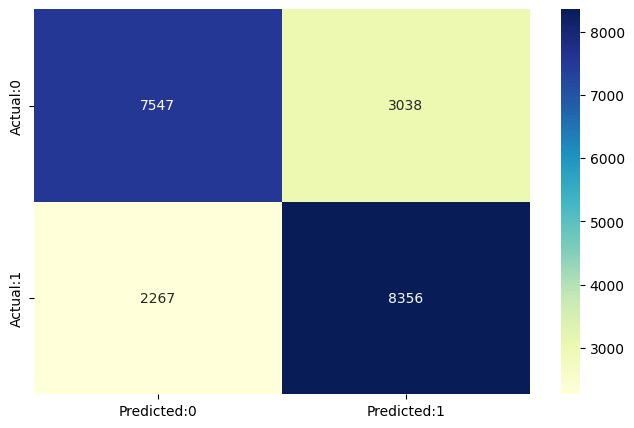

In [286]:
xg= XGBClassifier()
xg.fit(X_train, y_train)
y_pred1 = xg.predict(X_test)
print(accuracy_score(y_test, y_pred1))
xg_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.7549981139192757
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.74     10585
         1.0       0.74      0.79      0.76     10623

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208



,Actual,Y test predicted
5873,0.0,0.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,0.0
35934,1.0,1.0


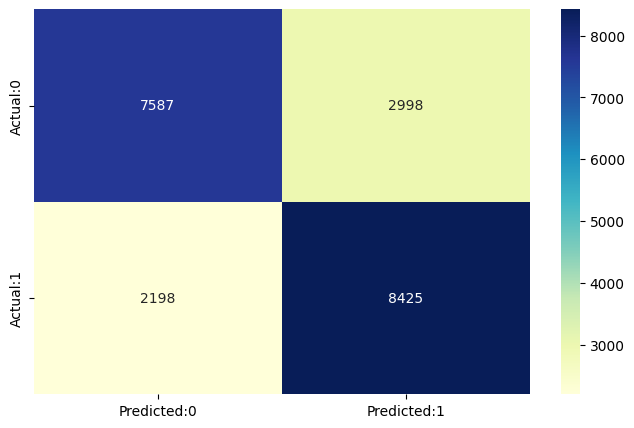

In [287]:
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
gb_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = gb.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

[LightGBM] [Info] Number of positive: 24723, number of negative: 24761
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 49484, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499616 -> initscore=-0.001536
[LightGBM] [Info] Start training from score -0.001536
0.7547152018106374
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     10585
         1.0       0.74      0.80      0.77     10623

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208



,Actual,Y test predicted
5873,0.0,0.0
18457,0.0,0.0
9862,0.0,1.0
60481,1.0,0.0
35934,1.0,1.0


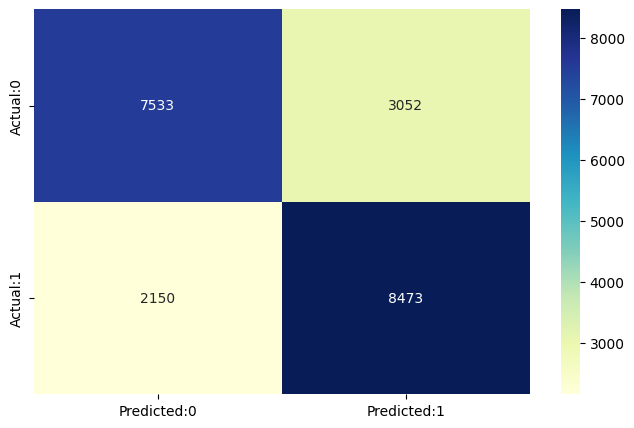

In [288]:
lgbm= lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred1 = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
lgbm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lgbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

#Graph With SMOTE

Text(0, 0.5, 'Accuracy')

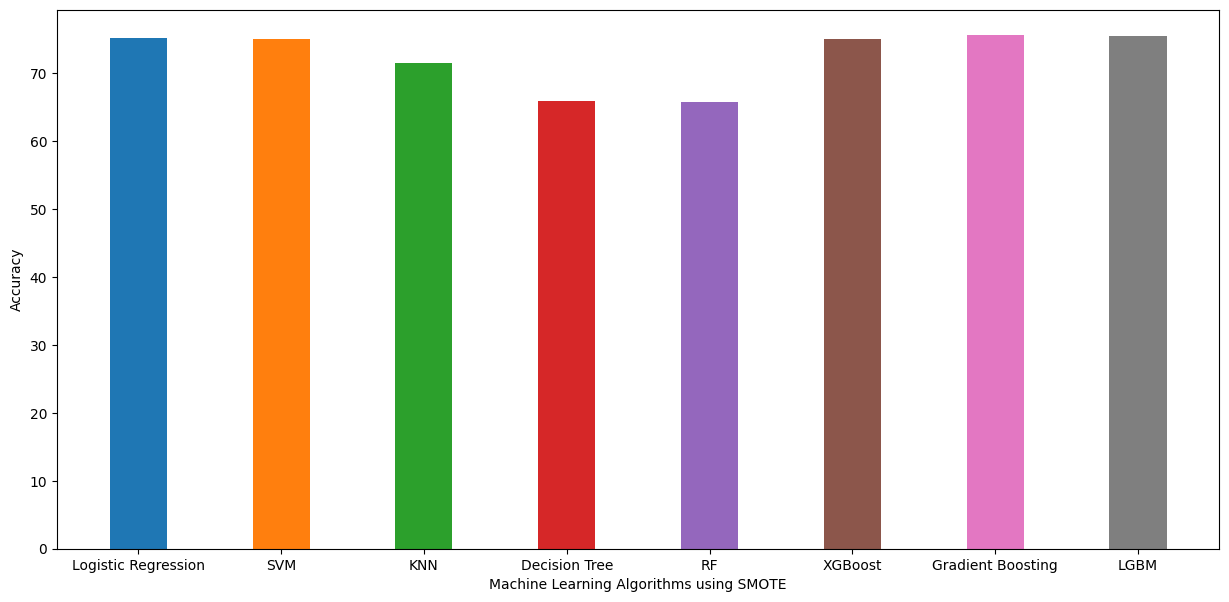

In [289]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')

#Graph of Both(With and Without SMOTE)

Text(0, 0.5, 'Accuracy')

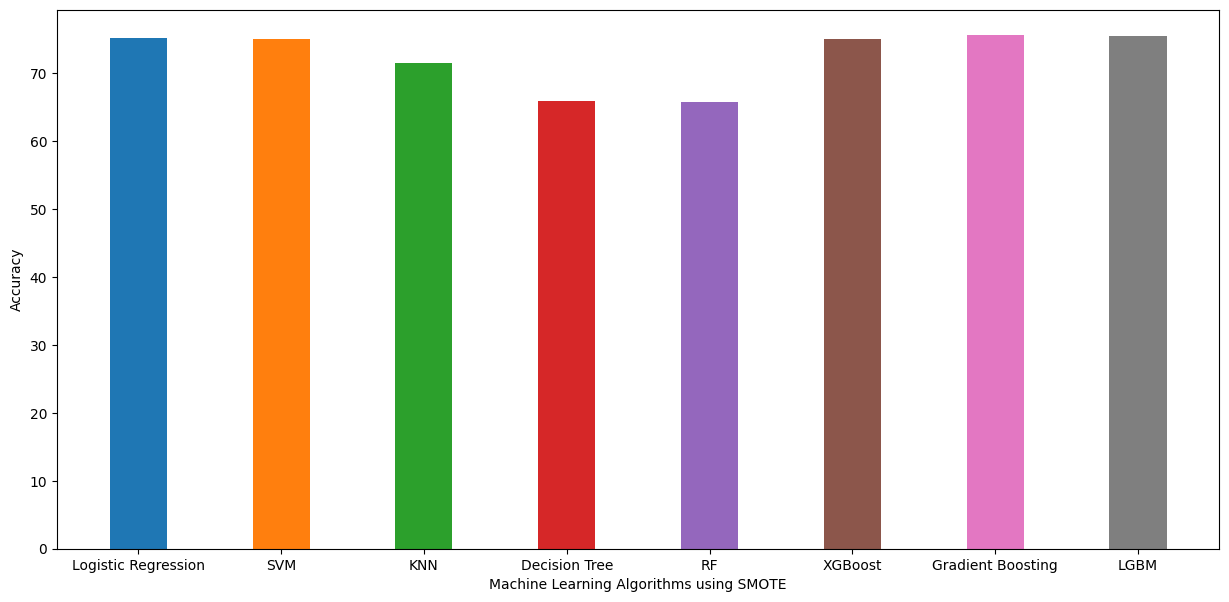

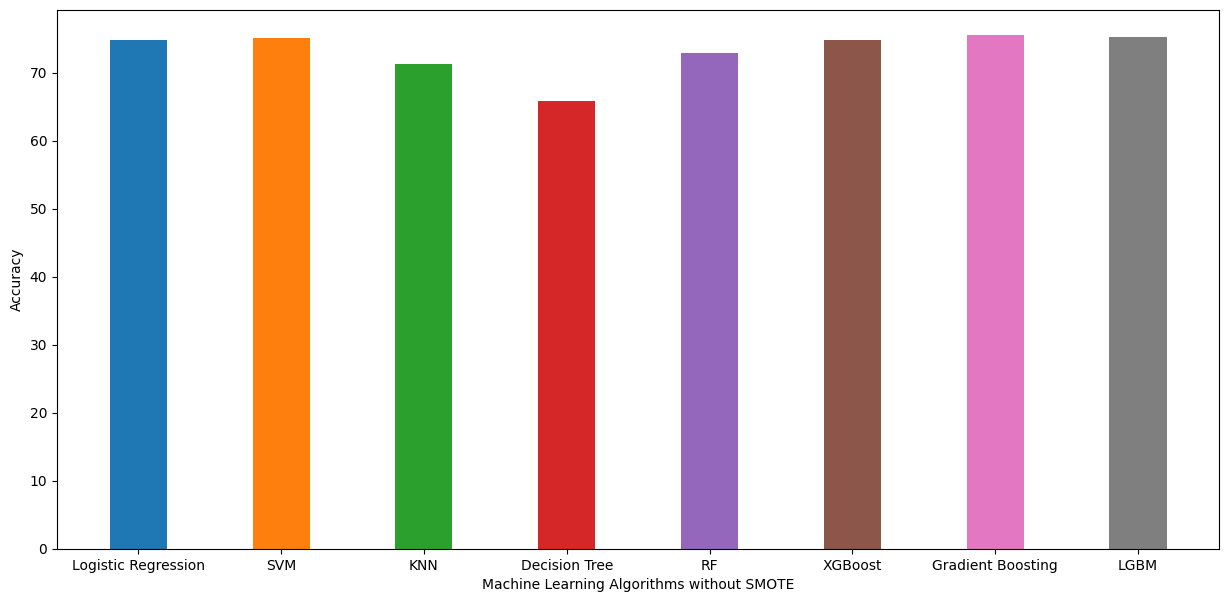

In [290]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')


plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms without SMOTE')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

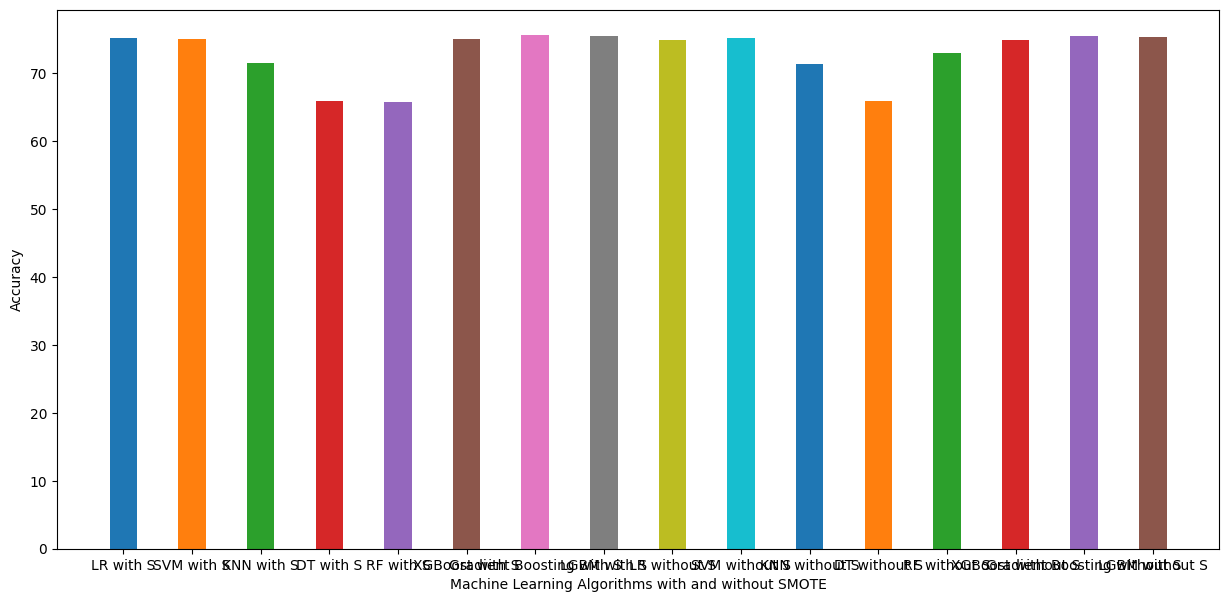

In [291]:
plt.figure(figsize=(15,7))
plt.bar("LR with S", logis_acc1 , width=0.4)
plt.bar("SVM with S", svm_acc1, width=0.4)
plt.bar("KNN with S",knn_acc1,width=0.4)
plt.bar("DT with S", dt_acc1 ,width=0.4)
plt.bar("RF with S", rf_acc1,width=0.4)
plt.bar("XGBoost with S", xg_acc1,width=0.4)
plt.bar("Gradient Boosting with S", gb_acc1,width=0.4)
plt.bar("LGBM with S",lgbm_acc1,width=0.4)
plt.bar("LR without S", logistic_acc, width=0.4)
plt.bar("SVM without S", svm_accu, width=0.4)
plt.bar("KNN without S",knn_accu,width=0.4)
plt.bar("DT without S", tree_accu,width=0.4)
plt.bar("RF without S", rf_accu,width=0.4)
plt.bar("XGBoost without S", xg_accu,width=0.4)
plt.bar("Gradient Boosting without S", gbc_accu,width=0.4)
plt.bar("LGBM without S",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms with and without SMOTE')
plt.ylabel('Accuracy')

#Print Accuracy Without SMOTE and With SMOTE

In [292]:
print("Logistic Regression", logistic_acc)
print("Logistic Regression with S", logis_acc1 )
print("SVM", svm_accu)
print("SVM with S", svm_acc1)
print("KNN",knn_accu)
print("KNN with S",knn_acc1)
print("Decision Tree", tree_accu)
print("Decision Tree with S", dt_acc1 )
print("Random Forest", rf_accu)
print("Random Forest with S", rf_acc1)
print("XGBoost", xg_accu)
print("XGBoost with S", xg_acc1)
print("Gradient Boosting", gbc_accu)
print("Gradient Boosting with S", gb_acc1)
print("LGBM",gbm_accu)
print("LGBM with S",lgbm_acc1)

Logistic Regression 74.83968313843833
Logistic Regression with S 75.0612976235383
SVM 75.12731044888721
SVM with S 75.0377216144851
KNN 71.34571859675593
KNN with S 71.41173142210486
Decision Tree 65.89023010184836
Decision Tree with S 65.91852131271219
Random Forest 72.91588079969823
Random Forest with S 65.76291965296114
XGBoost 74.84439834024896
XGBoost with S 74.98585439456808
Gradient Boosting 75.48095058468502
Gradient Boosting with S 75.49981139192758
LGBM 75.31120331950207
LGBM with S 75.47152018106374
